Dataset sourse: https://www.kaggle.com/datasets/aleksandrglotov/car-prices-poland?select=Car_Prices_Poland_Kaggle.csv
Upload by: ALEKSANDR GLOTOV 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Car_Prices_Poland_Kaggle.csv', index_col=0)

In [3]:
df.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.9+ MB


In [5]:
df.isnull().sum()

mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

👆  lac of generation name 👈✨✨✨✨  <--  to do in ML model 👈👈👈👈👈

In [6]:
df.describe().round().astype(str)

,year,mileage,vol_engine,price
count,117927.0,117927.0,117927.0,117927.0
mean,2013.0,140977.0,1812.0,70300.0
std,6.0,92369.0,644.0,84825.0
min,1945.0,0.0,0.0,500.0
25%,2009.0,67000.0,1461.0,21000.0
50%,2013.0,146269.0,1796.0,41900.0
75%,2018.0,203000.0,1995.0,83600.0
max,2022.0,2800000.0,7600.0,2399900.0


In [7]:
print(len(df[df['vol_engine'] == 0]))

1248


In [8]:
# df = df.drop(index=df[df['vol_engine'] < 40].index)  <--  to do in ML model 👈👈👈👈👈

to do im ML model 👆

In [9]:
df.describe(include=object)

,mark,model,generation_name,fuel,city,province
count,117927,117927,87842,117927,117927,117927
unique,23,328,364,6,4427,23
top,audi,astra,gen-8p-2003-2012,Gasoline,Warszawa,Mazowieckie
freq,12031,3331,1567,61597,7972,22219


👉 23  unique marks
👉 321 unique models

In [10]:
year_model_numers = {}
for i in range(1945, 2023):
    year_model_numers.update({i:int(len(df[['year', 'model']][df['year'] == i]))})
    #print(  len(df[['year', 'model']][df['year'] == i]) )
    
year_model_numers_series = pd.Series(year_model_numers)

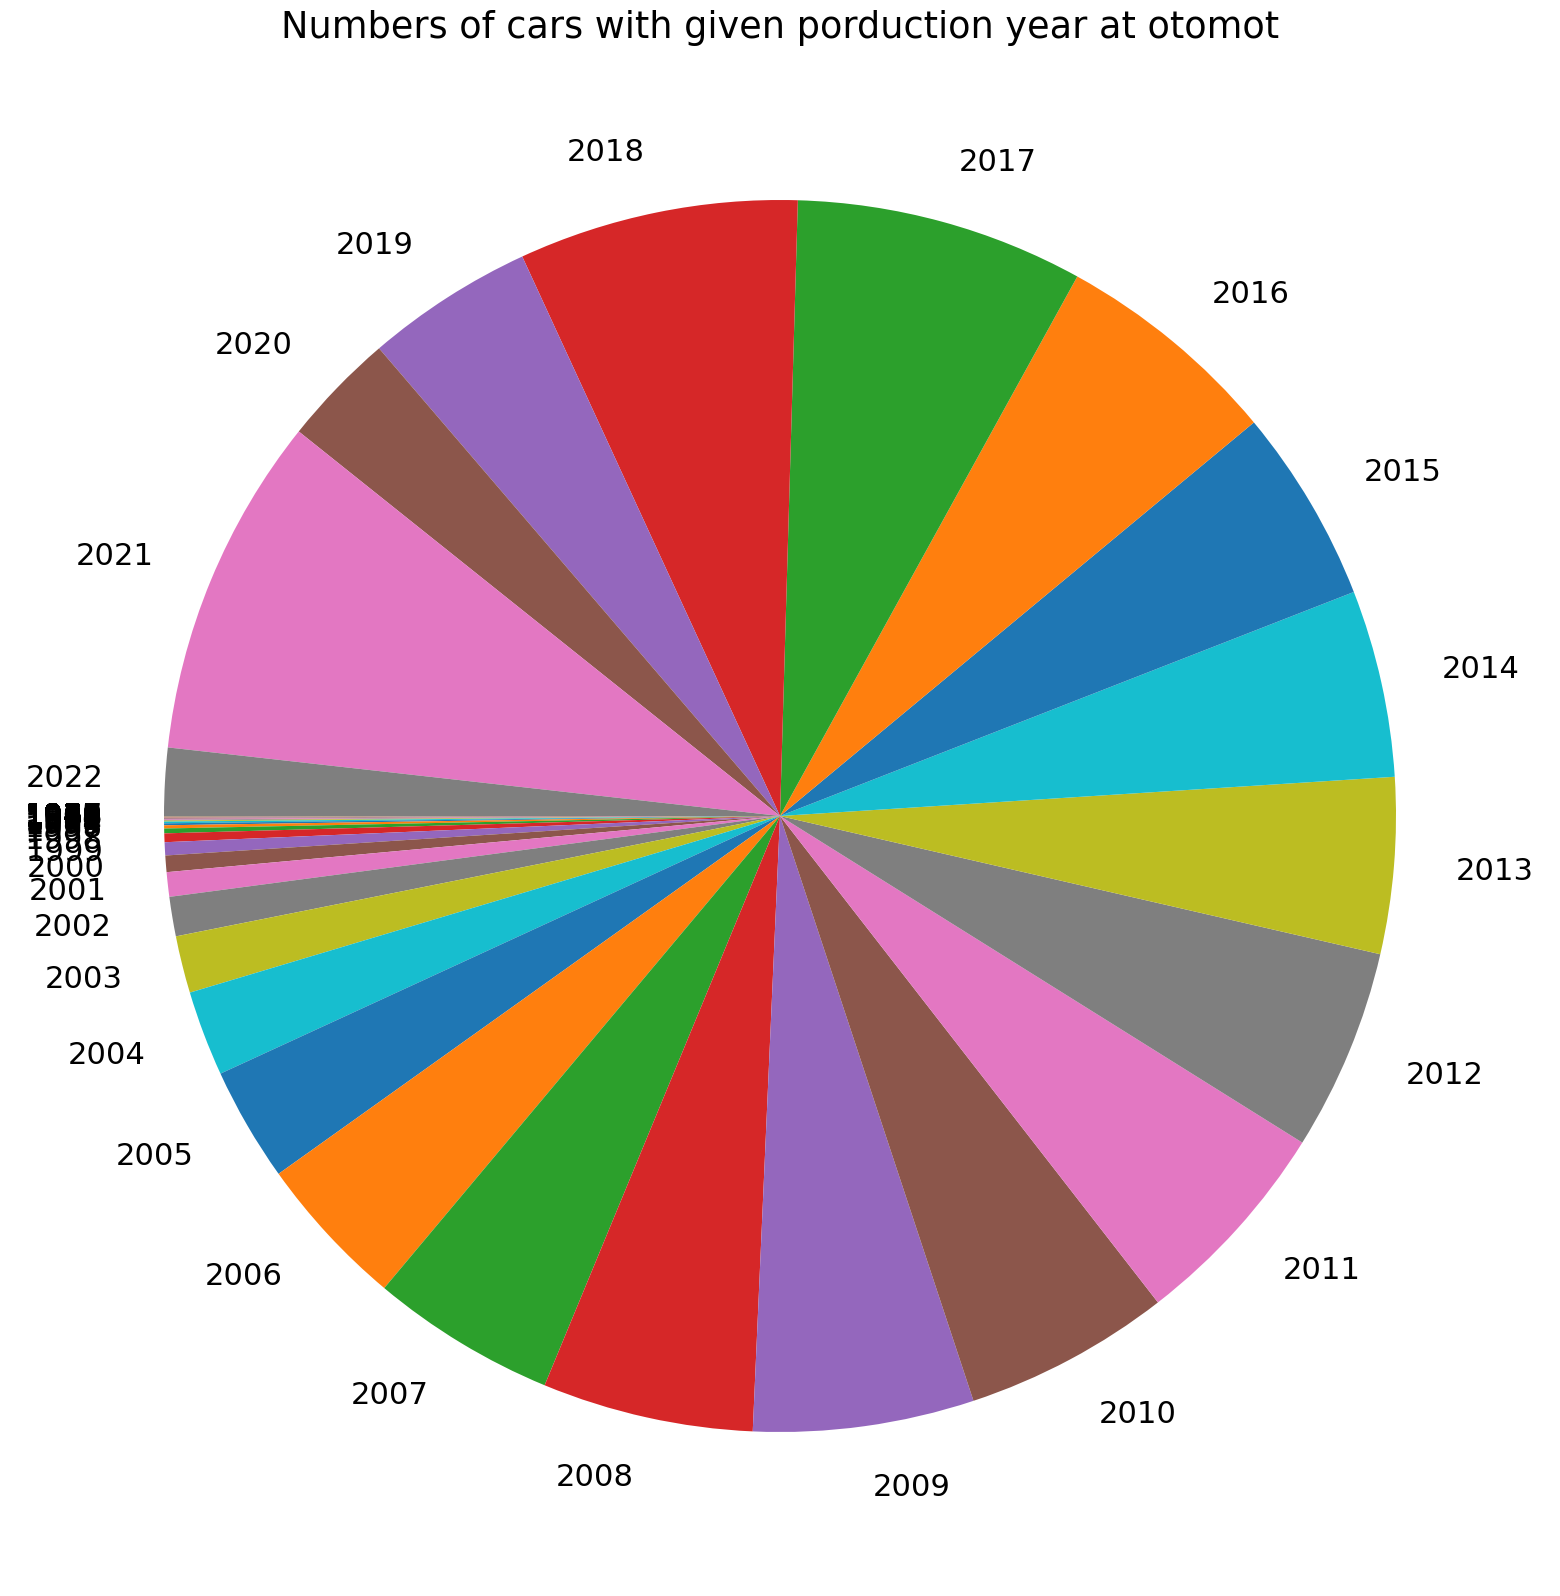

In [11]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 22})
plt.pie(year_model_numers_series.values,
        labels=year_model_numers_series.index,
        startangle=180
        )
plt.title('Numbers of cars with given porduction year at otomot')
plt.show()

In [12]:
from_2000_and_lower = year_model_numers_series[year_model_numers_series.index <= 2000 ] 

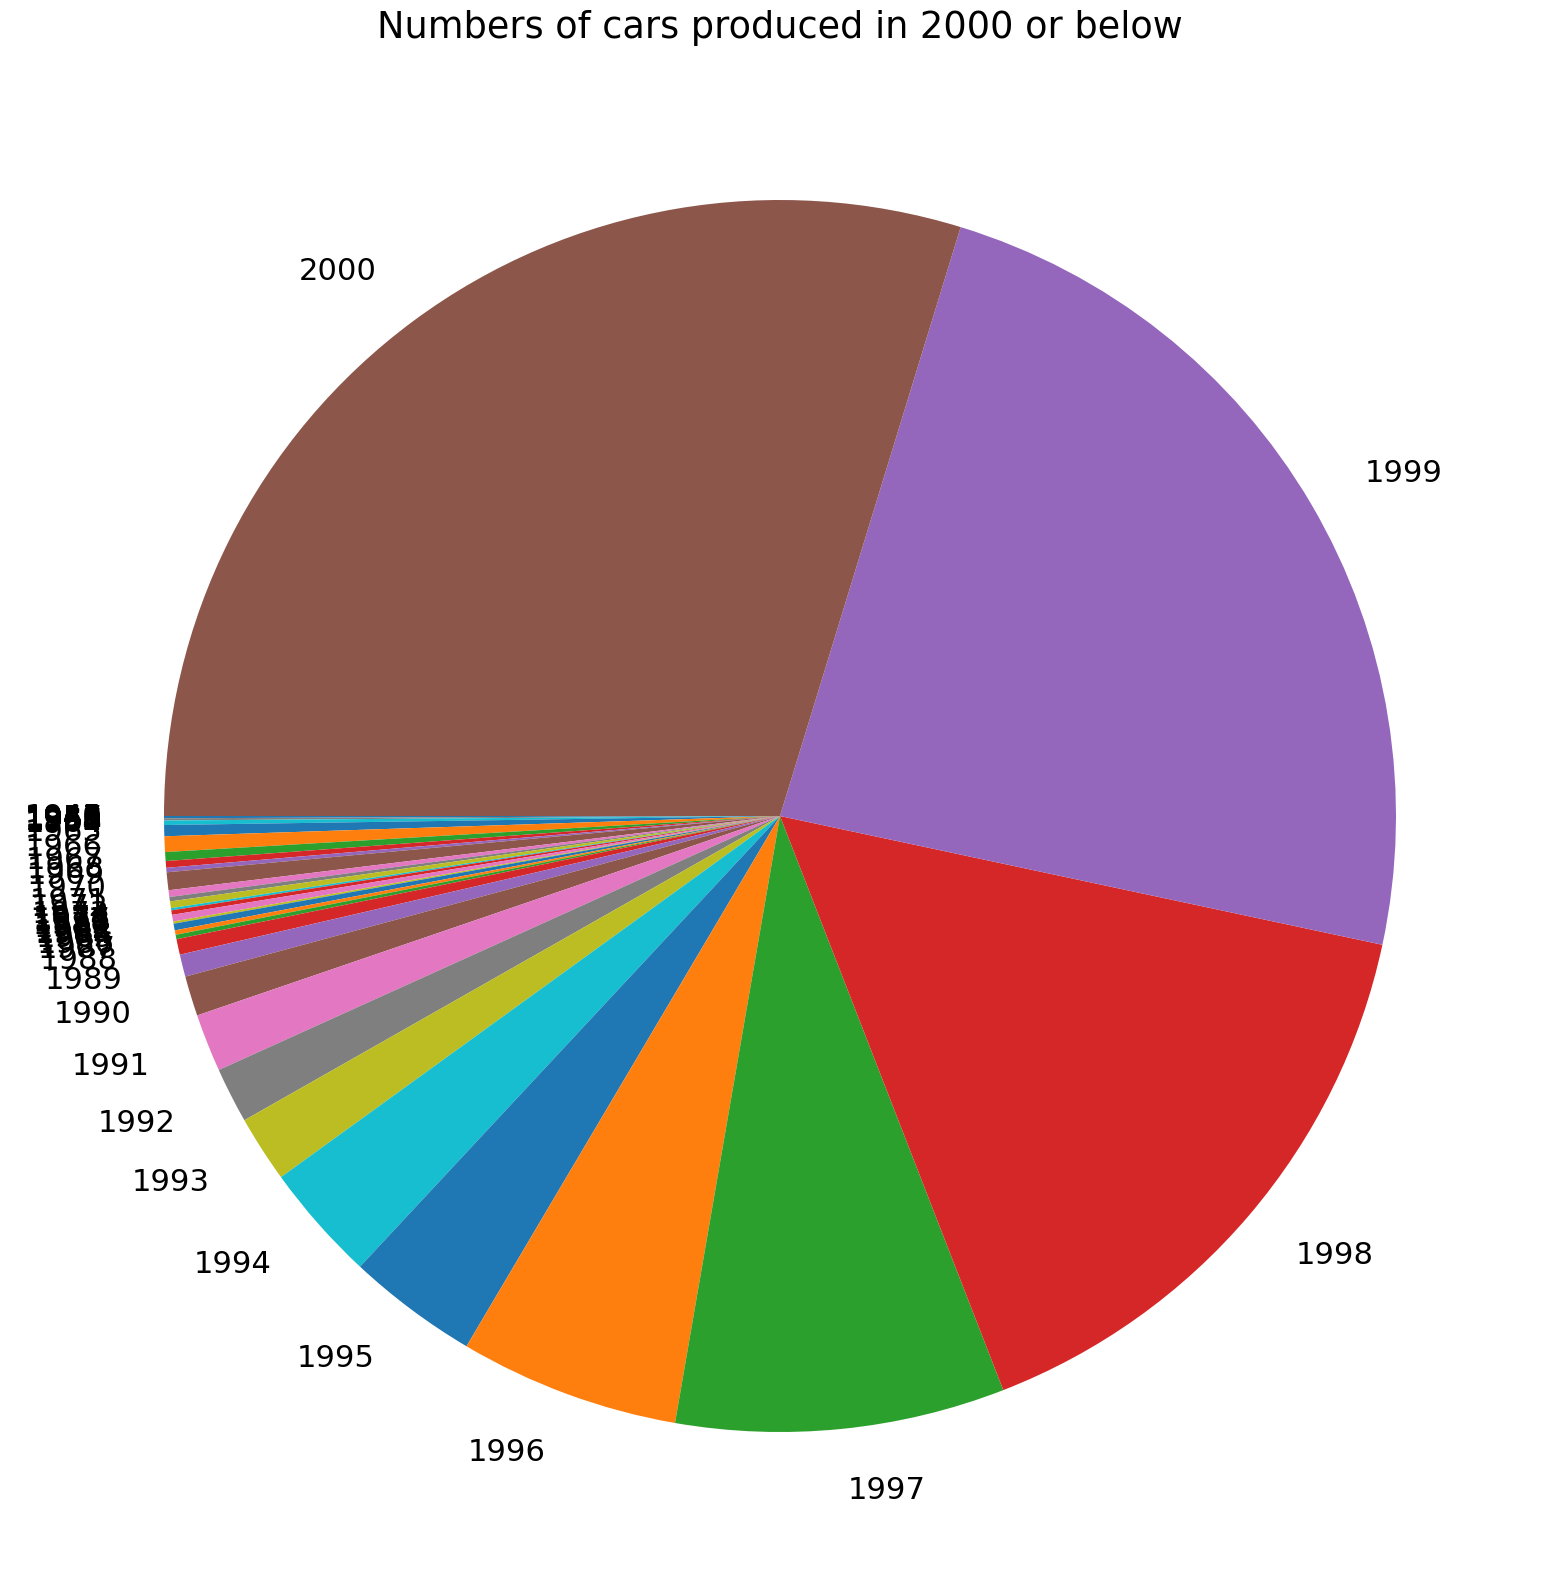

In [13]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 22})
plt.pie(from_2000_and_lower.values,
        labels=from_2000_and_lower.index,
        startangle=180
        )
plt.title('Numbers of cars produced in 2000 or below')
plt.show()

In [33]:
print(year_model_numers)

{1945: 1, 1946: 0, 1947: 0, 1948: 0, 1949: 0, 1950: 0, 1951: 0, 1952: 1, 1953: 0, 1954: 0, 1955: 0, 1956: 0, 1957: 0, 1958: 0, 1959: 0, 1960: 0, 1961: 0, 1962: 0, 1963: 0, 1964: 2, 1965: 5, 1966: 7, 1967: 4, 1968: 3, 1969: 2, 1970: 8, 1971: 3, 1972: 2, 1973: 3, 1974: 1, 1975: 0, 1976: 0, 1977: 0, 1978: 2, 1979: 0, 1980: 0, 1981: 3, 1982: 0, 1983: 1, 1984: 0, 1985: 3, 1986: 2, 1987: 2, 1988: 7, 1989: 10, 1990: 18, 1991: 26, 1992: 25, 1993: 30, 1994: 53, 1995: 59, 1996: 99, 1997: 148, 1998: 270, 1999: 405, 2000: 510, 2001: 757, 2002: 1220, 2003: 1766, 2004: 2641, 2005: 3534, 2006: 4755, 2007: 5735, 2008: 6528, 2009: 6828, 2010: 6400, 2011: 6596, 2012: 6240, 2013: 5445, 2014: 5790, 2015: 6021, 2016: 7021, 2017: 8909, 2018: 8647, 2019: 5200, 2020: 3526, 2021: 10559, 2022: 2094}


In [34]:
percent = {x: y / sum(year_model_numers.values()) *100 for x, y in year_model_numers.items()}

In [32]:
print(percent)

{1945: 0.000847982226292537, 1946: 0.0, 1947: 0.0, 1948: 0.0, 1949: 0.0, 1950: 0.0, 1951: 0.0, 1952: 0.000847982226292537, 1953: 0.0, 1954: 0.0, 1955: 0.0, 1956: 0.0, 1957: 0.0, 1958: 0.0, 1959: 0.0, 1960: 0.0, 1961: 0.0, 1962: 0.0, 1963: 0.0, 1964: 0.001695964452585074, 1965: 0.004239911131462684, 1966: 0.005935875584047758, 1967: 0.003391928905170148, 1968: 0.002543946678877611, 1969: 0.001695964452585074, 1970: 0.006783857810340296, 1971: 0.002543946678877611, 1972: 0.001695964452585074, 1973: 0.002543946678877611, 1974: 0.000847982226292537, 1975: 0.0, 1976: 0.0, 1977: 0.0, 1978: 0.001695964452585074, 1979: 0.0, 1980: 0.0, 1981: 0.002543946678877611, 1982: 0.0, 1983: 0.000847982226292537, 1984: 0.0, 1985: 0.002543946678877611, 1986: 0.001695964452585074, 1987: 0.001695964452585074, 1988: 0.005935875584047758, 1989: 0.008479822262925369, 1990: 0.015263680073265663, 1991: 0.022047537883605958, 1992: 0.021199555657313424, 1993: 0.025439466788776108, 1994: 0.044943057993504454, 1995: 0

In [35]:
year_model_numers_series = pd.Series(year_model_numers)
percent_series = pd.Series(percent)

In [36]:
year_model_numers_frame = pd.concat([year_model_numers_series, percent_series], axis=1)

In [39]:
year_model_numers_frame.columns = ['number', 'percent'] 
year_model_numers_frame.head(3)

,number,percent
1945,1,0.000848
1946,0,0.000000
1947,0,0.000000


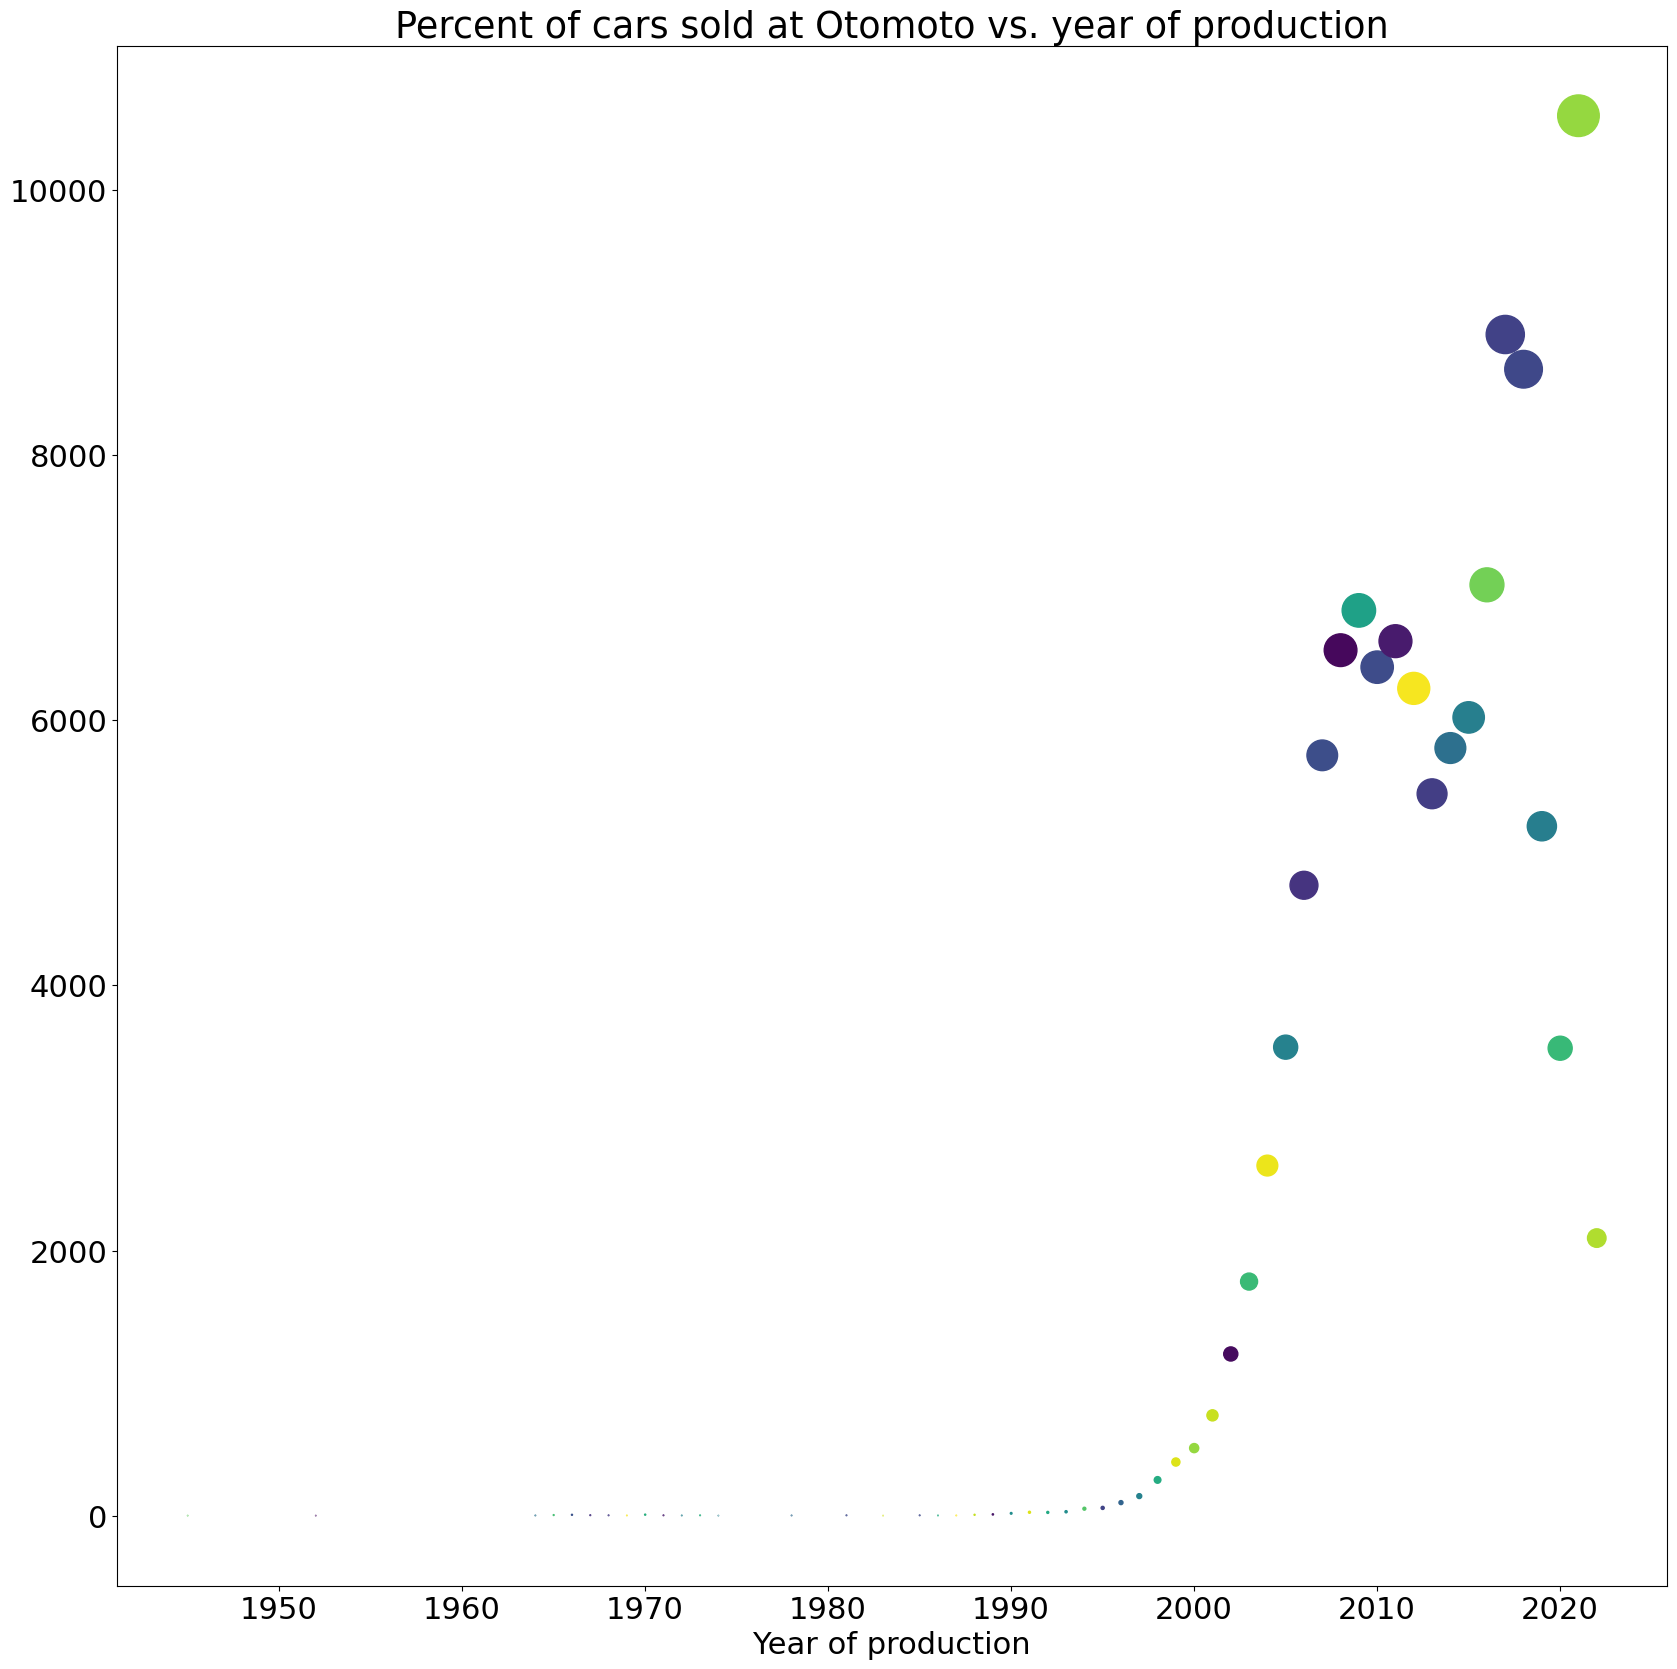

In [74]:
plt.figure(figsize=(20,20))
colors = np.random.rand(78)
plt.scatter(year_model_numers_frame.index, 
            year_model_numers_frame['number'], 
            s= year_model_numers_frame['percent']*100,
            c=colors,
            alpha = 1)
plt.title('Percent of cars sold at Otomoto vs. year of production')
plt.xlabel('Year of production')
plt.show()


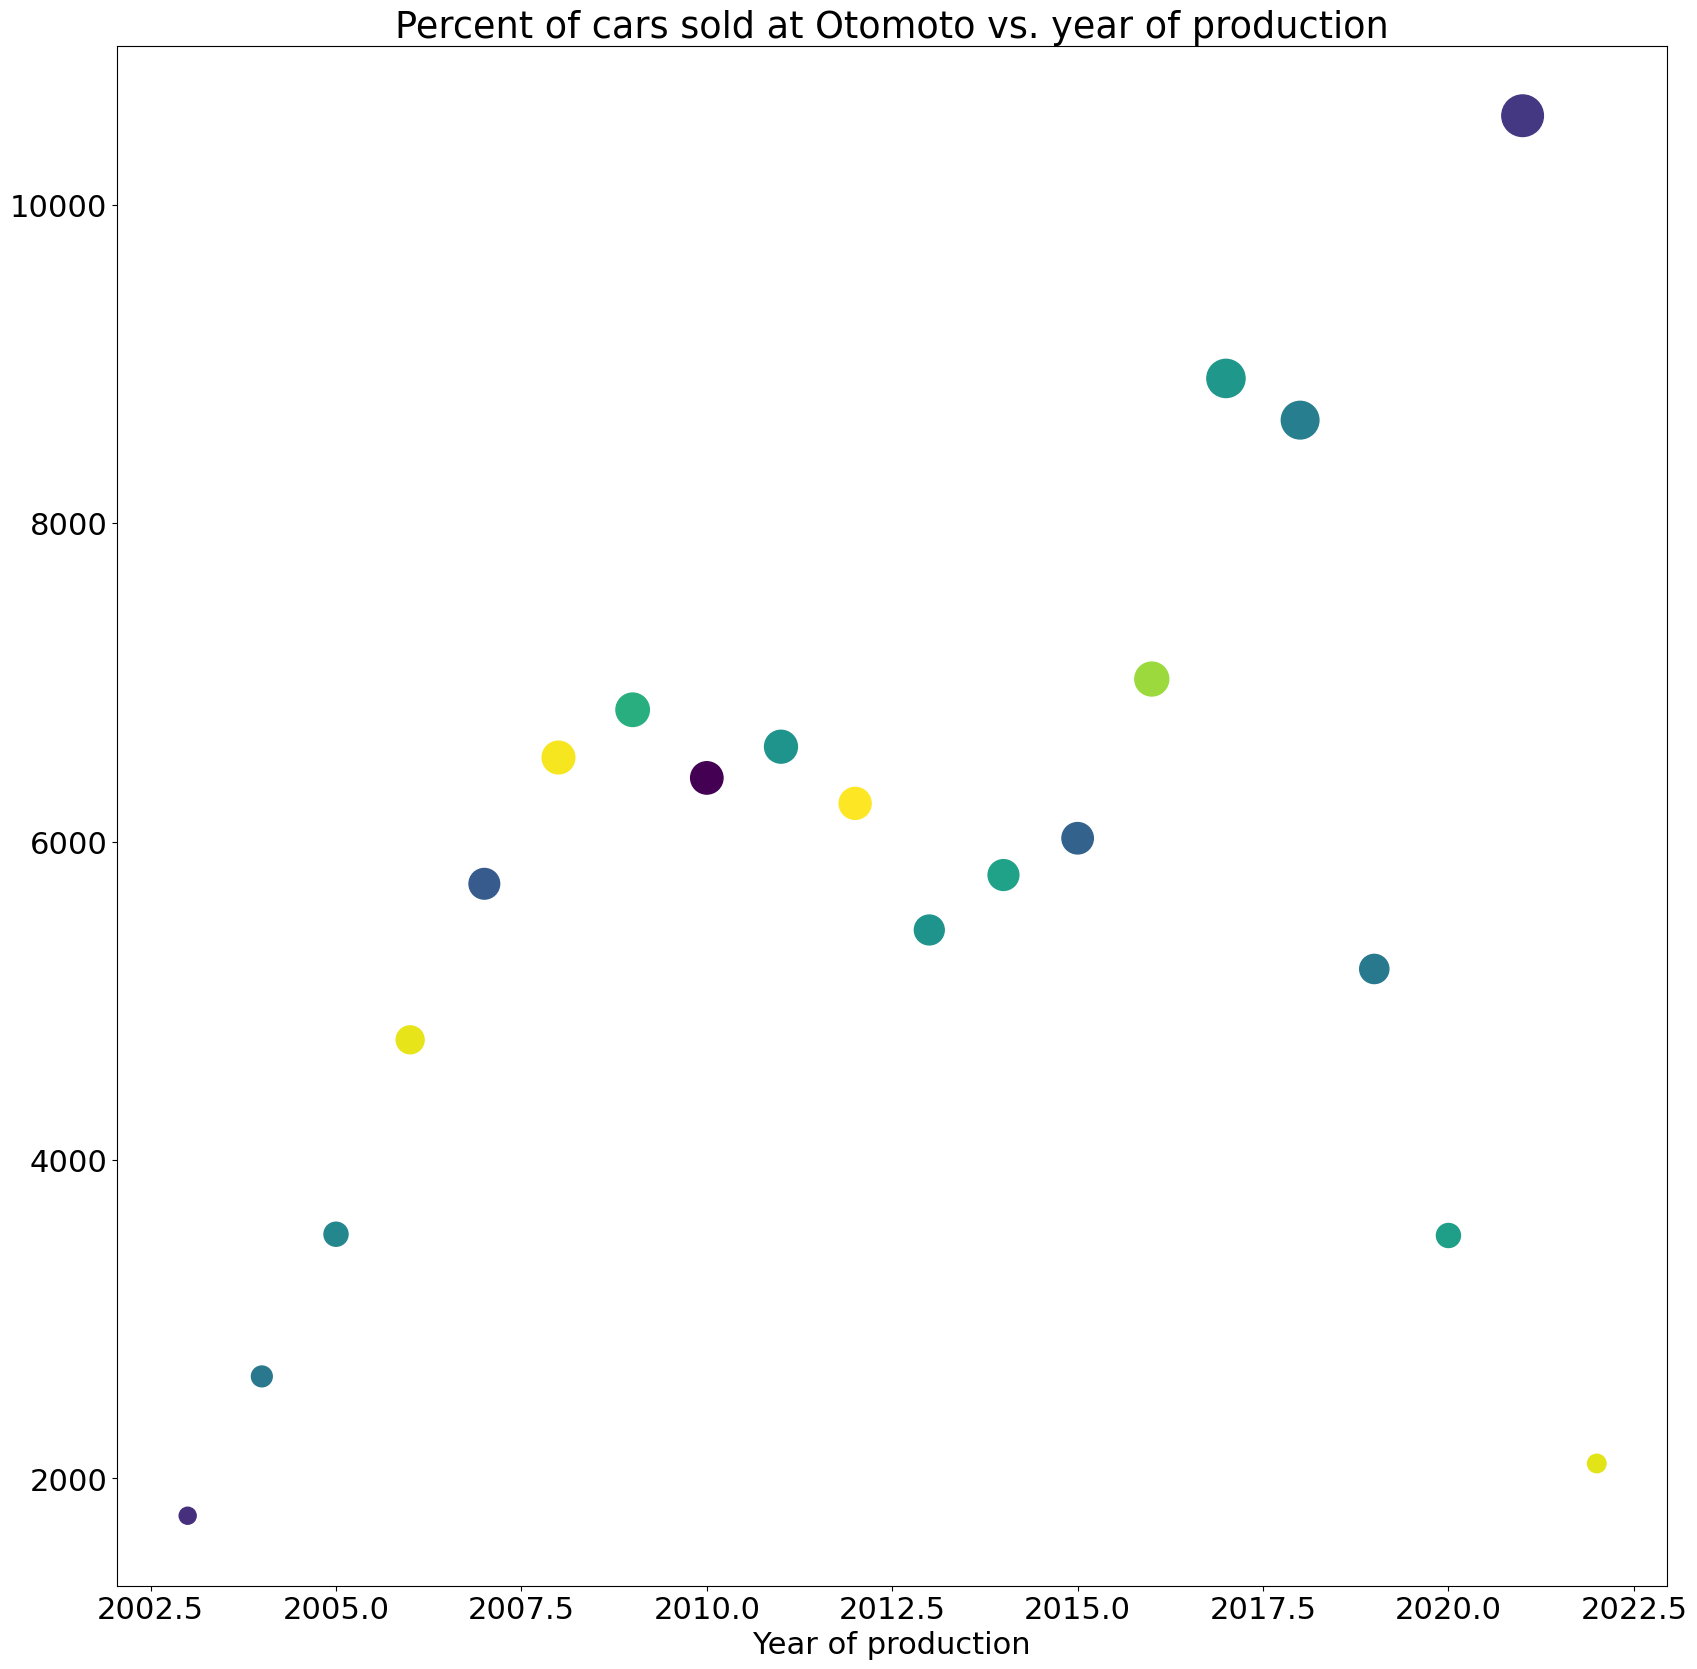

In [95]:
plt.figure(figsize=(20,20))
colors = np.random.rand(len(year_model_numers_frame.index[-20:]))
plt.scatter(year_model_numers_frame.index[-20:], 
            year_model_numers_frame['number'][-20:], 
            s= year_model_numers_frame['percent'][-20:]*100,
            c=colors,
            alpha = 1)
plt.title('Percent of cars sold at Otomoto vs. year of production')
plt.xlabel('Year of production')
plt.show()

In [93]:
year_model_numers_frame.index[-10:]

Int64Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64')